## 卷积原理

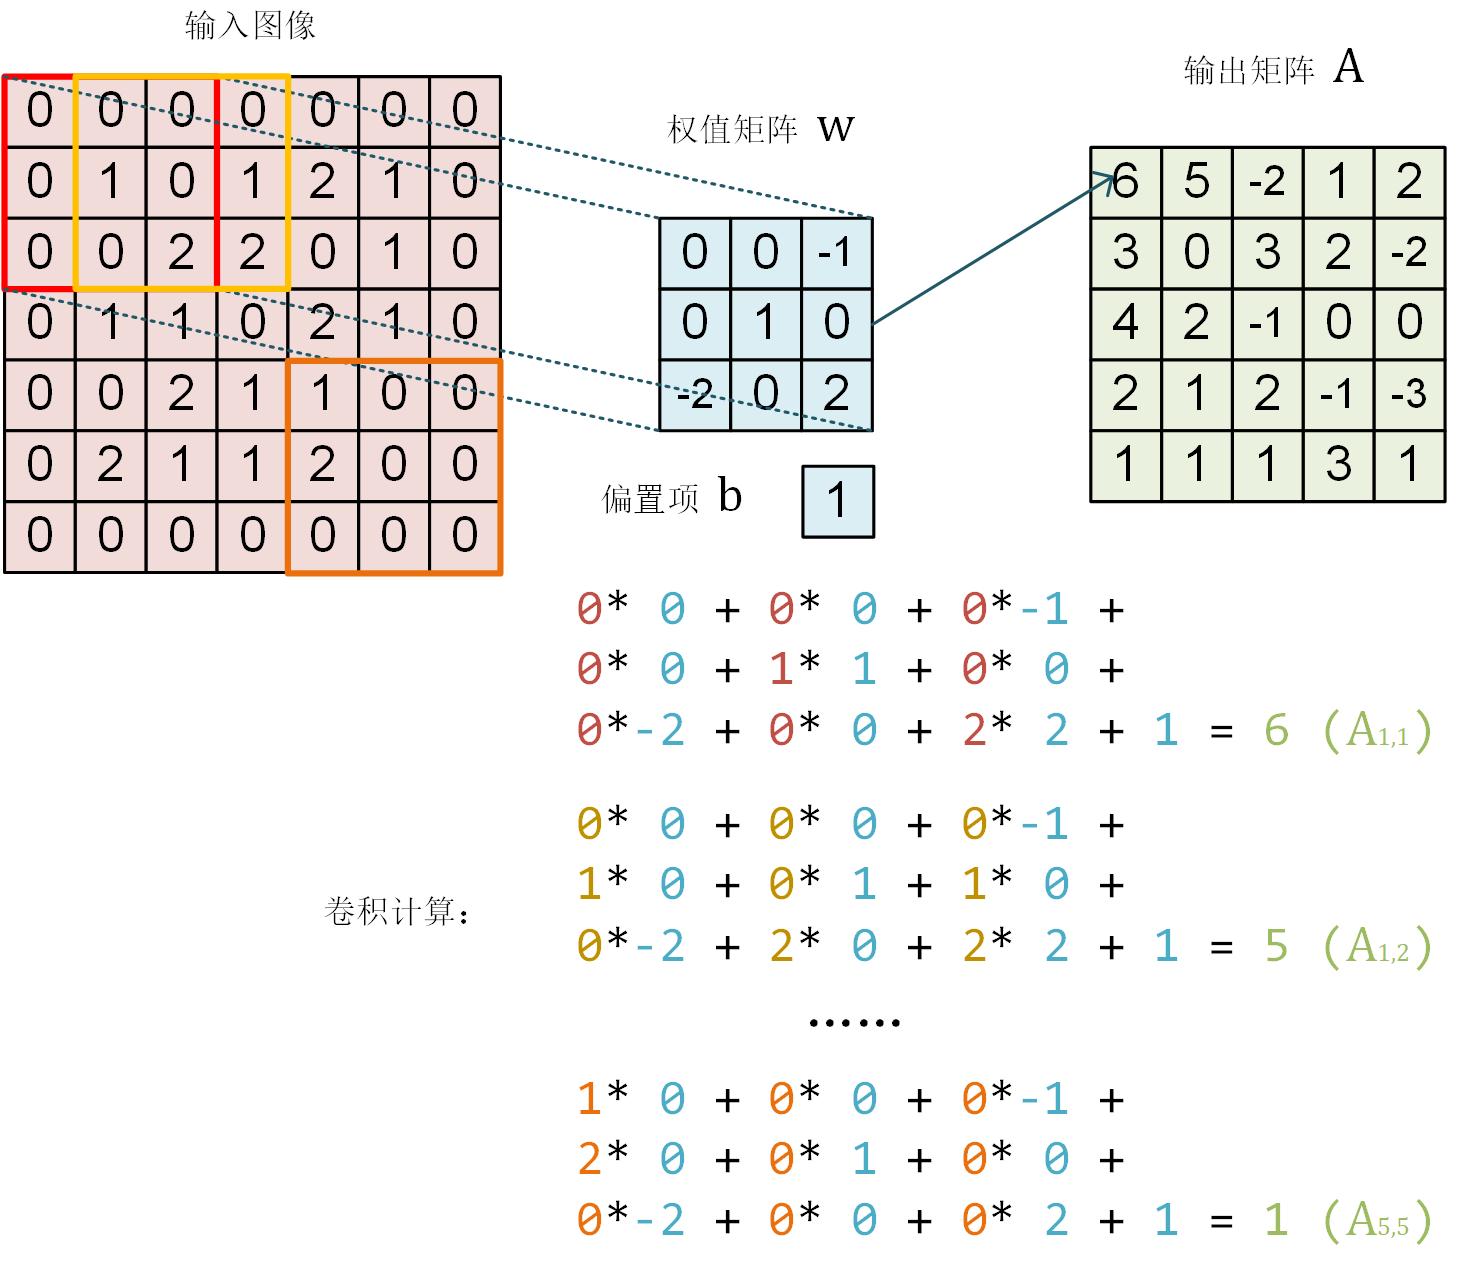

In [25]:
import numpy as np
import tensorflow as tf
# TensorFlow 的图像表示为 [图像数目，长，宽，色彩通道数] 的四维张量
# 这里我们的输入图像 image 的张量形状为 [1, 7, 7, 1]
image = np.array([[
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 2, 1, 0],
    [0, 0, 2, 2, 0, 1, 0],
    [0, 1, 1, 0, 2, 1, 0],
    [0, 0, 2, 1, 1, 0, 0],
    [0, 2, 1, 1, 2, 0, 0],
    [0, 0, 0, 0, 0, 0, 0]
]], dtype=np.float32)
image = np.expand_dims(image, axis=-1)  

W = np.array([[
    [ 0, 0, -1], 
    [ 0, 1, 0 ], 
    [-2, 0, 2 ]
]], dtype=np.float32)
b = np.array([1], dtype=np.float32)

# 然后建立一个仅有一个卷积层的模型，用 W 和 b 初始化 4 ：

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=1,              # 卷积层神经元（卷积核）数目
        kernel_size=[3, 3],     # 感受野大小
        kernel_initializer=tf.constant_initializer(W),
        bias_initializer=tf.constant_initializer(b)
    )]
)
output = model(image)
tf.squeeze(output)

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[ 6.,  5., -2.,  1.,  2.],
       [ 3.,  0.,  3.,  2., -2.],
       [ 4.,  2., -1.,  0.,  0.],
       [ 2.,  1.,  2., -1., -3.],
       [ 1.,  1.,  1.,  3.,  1.]], dtype=float32)>

可见与上图中矩阵A 中的值一致

## CNN的一个完整示例如下：

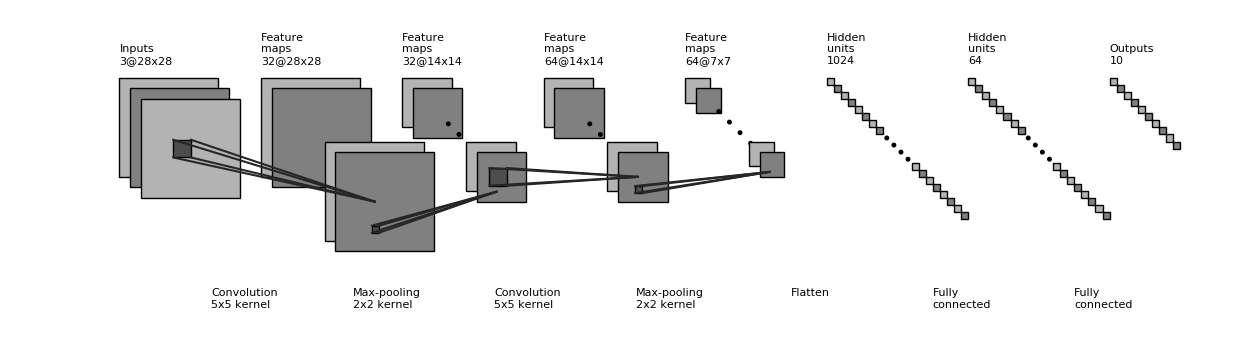

In [51]:
# 代码示例：

class CNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(
            filters=32,             # 卷积层神经元（卷积核）数目
            kernel_size=[5, 5],     # 感受野大小
            padding='same',         # padding策略（vaild 或 same）
            activation=tf.nn.relu   # 激活函数
        )
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
        self.conv2 = tf.keras.layers.Conv2D(
            filters=64,
            kernel_size=[5, 5],
            padding='same',
            activation=tf.nn.relu
        )
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
        self.flatten = tf.keras.layers.Reshape(target_shape=(7 * 7 * 64,))
        self.dense1 = tf.keras.layers.Dense(units=1024, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(units=10)

    def call(self, inputs):
        x = self.conv1(inputs)                  # [batch_size, 28, 28, 32]
        x = self.pool1(x)                       # [batch_size, 14, 14, 32]
        x = self.conv2(x)                       # [batch_size, 14, 14, 64]
        x = self.pool2(x)                       # [batch_size, 7, 7, 64]
        x = self.flatten(x)                     # [batch_size, 7 * 7 * 64]
        x = self.dense1(x)                      # [batch_size, 1024]
        x = self.dense2(x)                      # [batch_size, 10]
        output = tf.nn.softmax(x)
        return output

#### 关于
`self.flatten = tf.keras.layers.Reshape(target_shape=(7 * 7 * 64,))` 的效果展示如下：


In [50]:

class CNN1(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Reshape(target_shape=(3 * 3 * 4,))

    def call(self, inputs):
        print(tf.squeeze(inputs))
        x = self.flatten(inputs)            
        print(tf.squeeze(x))
        return x
    
model=CNN1()
input_shape = (1,3,3,4)
x = tf.random.normal(input_shape)
x
y = model(x)
y.shape

tf.Tensor(
[[[ 1.4544924   1.0281926  -1.2348695  -0.09877259]
  [-0.14135914 -0.4344588   2.2322612   0.07043284]
  [ 2.4642973   0.33659226  0.06656646  1.3048705 ]]

 [[-0.73091763 -1.713886    0.14920212  1.1123501 ]
  [ 0.74520755 -1.1080611  -0.6804074   0.5462578 ]
  [ 0.8687384   0.21147014  1.2883971   0.7471441 ]]

 [[ 0.27219394  0.3322799   0.64613694  0.06431975]
  [-0.11020096 -0.5419595  -1.1969218  -1.4434497 ]
  [-0.5476837   0.338701    0.66173214  0.71664697]]], shape=(3, 3, 4), dtype=float32)
tf.Tensor(
[ 1.4544924   1.0281926  -1.2348695  -0.09877259 -0.14135914 -0.4344588
  2.2322612   0.07043284  2.4642973   0.33659226  0.06656646  1.3048705
 -0.73091763 -1.713886    0.14920212  1.1123501   0.74520755 -1.1080611
 -0.6804074   0.5462578   0.8687384   0.21147014  1.2883971   0.7471441
  0.27219394  0.3322799   0.64613694  0.06431975 -0.11020096 -0.5419595
 -1.1969218  -1.4434497  -0.5476837   0.338701    0.66173214  0.71664697], shape=(36,), dtype=float32)


TensorShape([1, 36])

In [57]:
# 数据获取
import numpy as np

class MNISTLoader():
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.train_data, self.train_label), (self.test_data, self.test_label) = mnist.load_data()
        # MNIST中的图像默认为uint8（0-255的数字）。以下代码将其归一化到0-1之间的浮点数，并在最后增加一维作为颜色通道
        self.train_data = np.expand_dims(self.train_data.astype(np.float32) / 255.0, axis=-1)      # [60000, 28, 28, 1]
        self.test_data = np.expand_dims(self.test_data.astype(np.float32) / 255.0, axis=-1)        # [10000, 28, 28, 1]
        self.train_label = self.train_label.astype(np.int32)    # [60000]
        self.test_label = self.test_label.astype(np.int32)      # [10000]
        self.num_train_data, self.num_test_data = self.train_data.shape[0], self.test_data.shape[0]

    def get_batch(self, batch_size):
        # 从数据集中随机取出batch_size个元素并返回
        index = np.random.randint(0, self.num_train_data, batch_size)
        return self.train_data[index, :], self.train_label[index]
    
# 定义超参数：
num_epochs=5
batch_size=50  # 每批次取50
learning_rate=0.001

# 实例化模型
model=CNN()
data_loader=MNISTLoader()
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)


# 然后迭代进行以下步骤：
    # 1从 DataLoader 中随机取一批训练数据；
num_batches=int(data_loader.num_train_data //batch_size*num_epochs)
for batch_index in range(num_batches):
    if batch_index>1000: break
    X,y = data_loader.get_batch(batch_size)
    # 2. 将这批数据送入模型，计算出模型的预测值；
    with tf.GradientTape() as tape:
        y_pred = model(X)
        # 3.将模型预测值与真实值进行比较，计算损失函数（loss）。这里使用 tf.keras.losses 中的交叉熵函数作为损失函数；
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred=y_pred)
        loss = tf.reduce_mean(loss)
        print("batch %d: loss %f" % (batch_index, loss.numpy()))
    # 4. 计算损失函数关于模型变量的导数；
    grads = tape.gradient(loss, model.variables)
    # 5. 将求出的导数值传入优化器，使用优化器的 apply_gradients 方法更新模型参数以最小化损失函数（优化器的详细使用方法见 前章 ）。    
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))



batch 0: loss 2.305828
batch 1: loss 2.166107
batch 2: loss 2.132509
batch 3: loss 1.895948
batch 4: loss 1.891001
batch 5: loss 1.525225
batch 6: loss 1.402668
batch 7: loss 1.732071
batch 8: loss 1.223935
batch 9: loss 1.053816
batch 10: loss 1.128780
batch 11: loss 0.913213
batch 12: loss 0.702156
batch 13: loss 0.619767
batch 14: loss 0.645286
batch 15: loss 0.809210
batch 16: loss 0.732912
batch 17: loss 0.894821
batch 18: loss 0.554905
batch 19: loss 0.599380
batch 20: loss 0.647047
batch 21: loss 0.715728
batch 22: loss 0.702279
batch 23: loss 0.576959
batch 24: loss 0.409707
batch 25: loss 0.446231
batch 26: loss 0.533968
batch 27: loss 0.401675
batch 28: loss 0.377923
batch 29: loss 0.386316
batch 30: loss 0.261071
batch 31: loss 0.377857
batch 32: loss 0.360588
batch 33: loss 0.338514
batch 34: loss 0.359992
batch 35: loss 0.344319
batch 36: loss 0.593604
batch 37: loss 0.346263
batch 38: loss 0.261045
batch 39: loss 0.476494
batch 40: loss 0.447335
batch 41: loss 0.174162
ba

batch 334: loss 0.033925
batch 335: loss 0.015829
batch 336: loss 0.111777
batch 337: loss 0.074119
batch 338: loss 0.043226
batch 339: loss 0.159799
batch 340: loss 0.113173
batch 341: loss 0.043440
batch 342: loss 0.142704
batch 343: loss 0.014001
batch 344: loss 0.032905
batch 345: loss 0.070621
batch 346: loss 0.057909
batch 347: loss 0.026852
batch 348: loss 0.046510
batch 349: loss 0.069848
batch 350: loss 0.027446
batch 351: loss 0.183587
batch 352: loss 0.053810
batch 353: loss 0.144885
batch 354: loss 0.241850
batch 355: loss 0.118508
batch 356: loss 0.062977
batch 357: loss 0.009460
batch 358: loss 0.085678
batch 359: loss 0.010076
batch 360: loss 0.121295
batch 361: loss 0.117458
batch 362: loss 0.036584
batch 363: loss 0.099230
batch 364: loss 0.076616
batch 365: loss 0.008266
batch 366: loss 0.014680
batch 367: loss 0.049539
batch 368: loss 0.127690
batch 369: loss 0.008153
batch 370: loss 0.102529
batch 371: loss 0.019422
batch 372: loss 0.058090
batch 373: loss 0.016170


batch 663: loss 0.083966
batch 664: loss 0.118537
batch 665: loss 0.007543
batch 666: loss 0.059072
batch 667: loss 0.270890
batch 668: loss 0.031541
batch 669: loss 0.035227
batch 670: loss 0.028046
batch 671: loss 0.002412
batch 672: loss 0.074993
batch 673: loss 0.027892
batch 674: loss 0.004934
batch 675: loss 0.028781
batch 676: loss 0.032567
batch 677: loss 0.098020
batch 678: loss 0.067228
batch 679: loss 0.045198
batch 680: loss 0.032500
batch 681: loss 0.016110
batch 682: loss 0.008322
batch 683: loss 0.025676
batch 684: loss 0.015290
batch 685: loss 0.007601
batch 686: loss 0.035079
batch 687: loss 0.001091
batch 688: loss 0.008557
batch 689: loss 0.014713
batch 690: loss 0.005967
batch 691: loss 0.000941
batch 692: loss 0.078117
batch 693: loss 0.102837
batch 694: loss 0.021002
batch 695: loss 0.040579
batch 696: loss 0.033798
batch 697: loss 0.019635
batch 698: loss 0.089218
batch 699: loss 0.166555
batch 700: loss 0.073994
batch 701: loss 0.106267
batch 702: loss 0.040161


batch 993: loss 0.008341
batch 994: loss 0.002920
batch 995: loss 0.032708
batch 996: loss 0.129650
batch 997: loss 0.048796
batch 998: loss 0.063908
batch 999: loss 0.065262
batch 1000: loss 0.004746


In [56]:
sparse_categorical_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
num_batches = int(data_loader.num_test_data // batch_size)
for batch_index in range(num_batches):
    start_index, end_index = batch_index * batch_size, (batch_index + 1) * batch_size
    y_pred = model.predict(data_loader.test_data[start_index: end_index])
    sparse_categorical_accuracy.update_state(y_true=data_loader.test_label[start_index: end_index], y_pred=y_pred)
print("test accuracy: %f" % sparse_categorical_accuracy.result())

test accuracy: 0.979200
